In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score as score
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")


In [2]:
train_values = pd.read_csv('Building Damage file.csv')

In [3]:
train_values.head()
train_values.shape

(260601, 39)

In [4]:
train_labels = pd.read_csv("train_labels.csv")

In [5]:
train_labels.head()
train_labels.shape

(260601, 2)

# EXPLORATORY DATA ANALYSIS

## Visualization of all feartures in respect to target variable

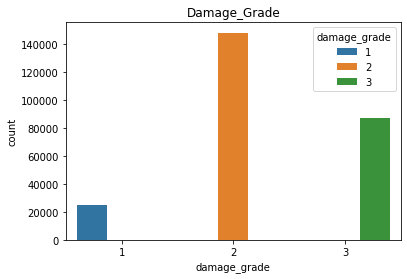

In [6]:
sb.countplot(x="damage_grade", data=train_labels,hue=train_labels["damage_grade"])
plt.title("Damage_Grade")
plt.show()

In [7]:
pd.value_counts(train_labels.damage_grade)

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

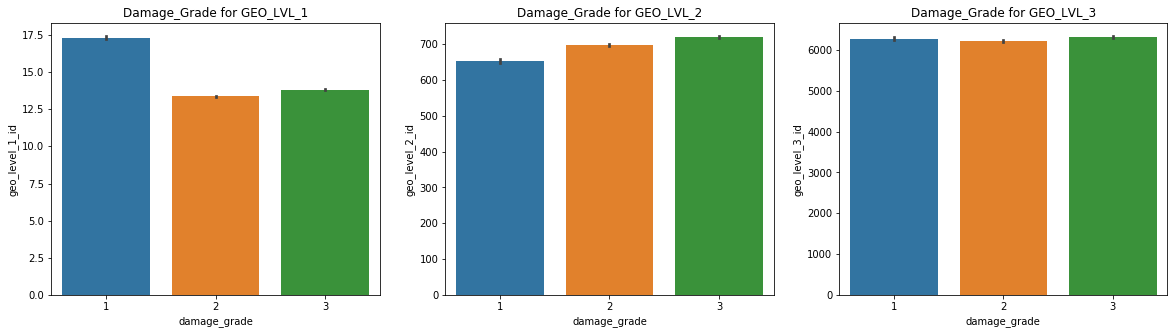

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['geo_level_1_id'])
plt.title("Damage_Grade for GEO_LVL_1")

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['geo_level_2_id'])
plt.title("Damage_Grade for GEO_LVL_2")

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['geo_level_3_id'])
plt.title("Damage_Grade for GEO_LVL_3")

plt.show()

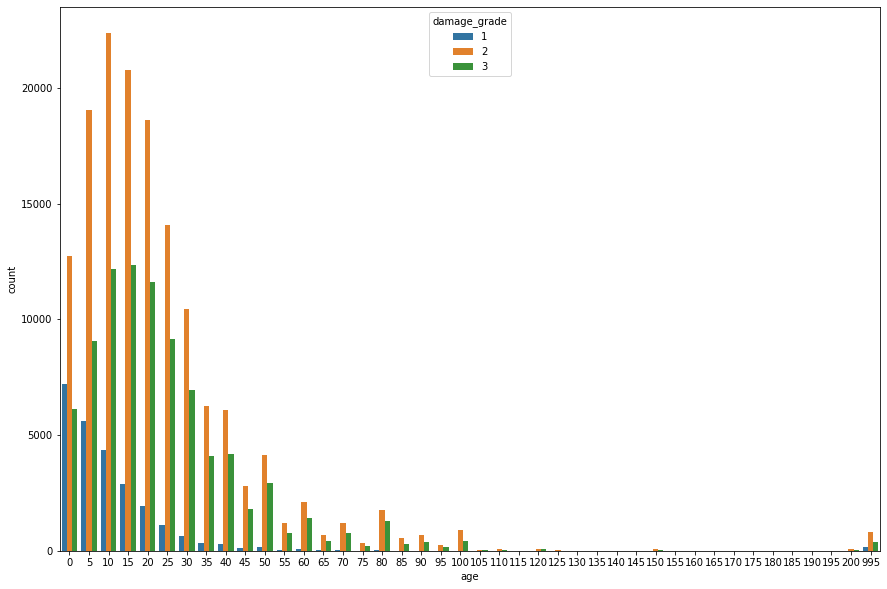

In [9]:
plt.figure(figsize=(50,10))
plt.subplot(1,3,3)
sb.countplot(train_values['age'],hue=train_labels["damage_grade"])


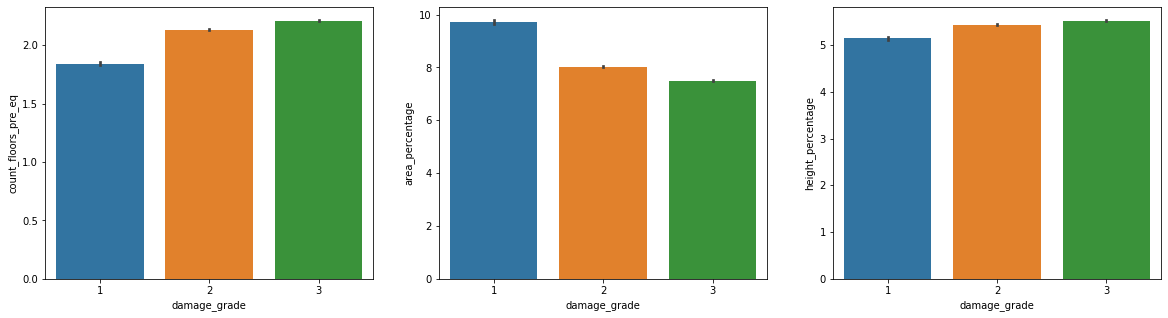

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['count_floors_pre_eq'])

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['area_percentage'])

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['height_percentage'])

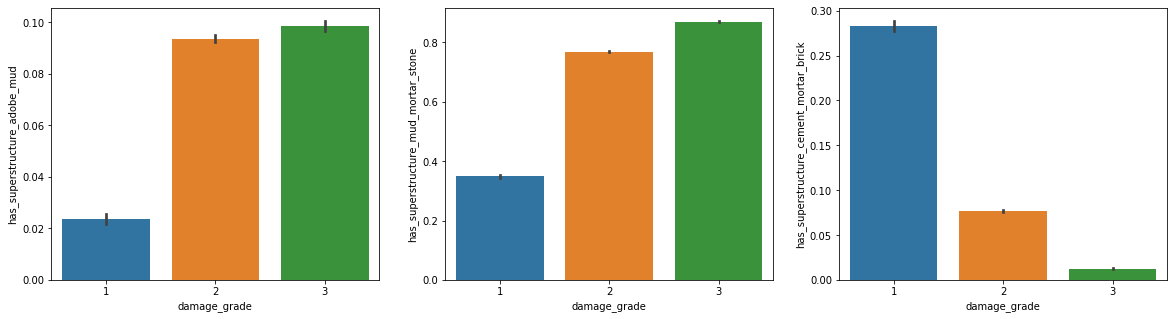

In [11]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_adobe_mud'])

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_mud_mortar_stone'])

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_cement_mortar_brick'])



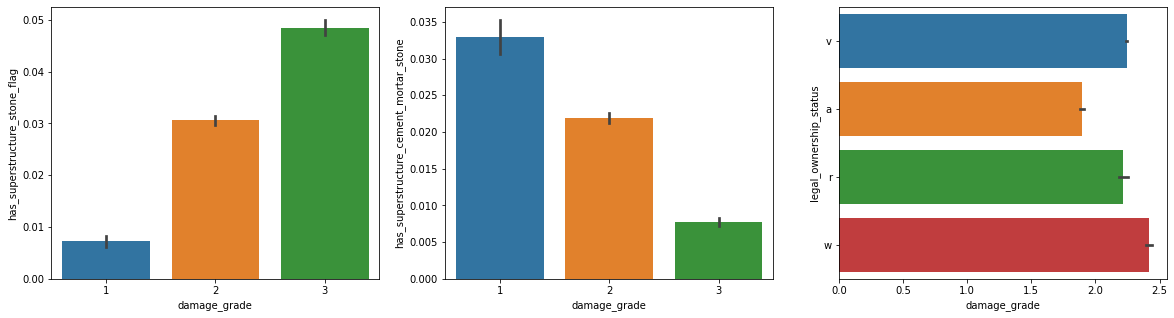

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_stone_flag'])

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_cement_mortar_stone'])

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['legal_ownership_status']) 

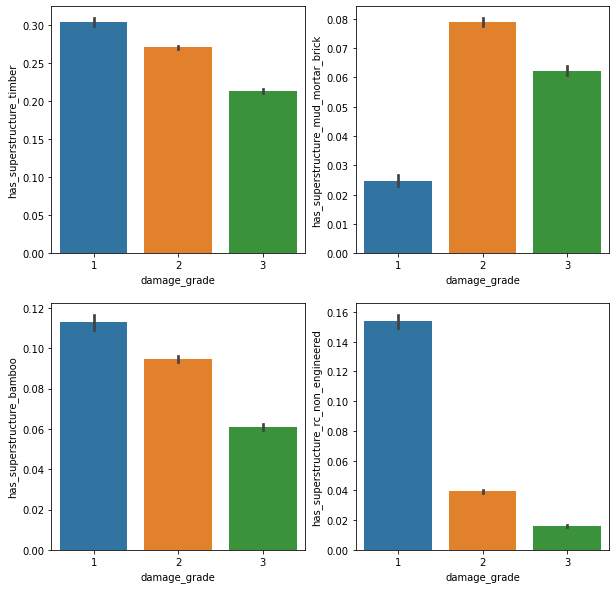

In [13]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

sb.barplot(y= train_values['has_superstructure_timber'], x= train_labels['damage_grade'], ax = axes[0][0])
sb.barplot(y= train_values['has_superstructure_mud_mortar_brick'], x= train_labels['damage_grade'], ax = axes[0][1])
sb.barplot(y= train_values['has_superstructure_bamboo'], x= train_labels['damage_grade'], ax = axes[1][0])
sb.barplot(y= train_values['has_superstructure_rc_non_engineered'], x= train_labels['damage_grade'], ax = axes[1][1])

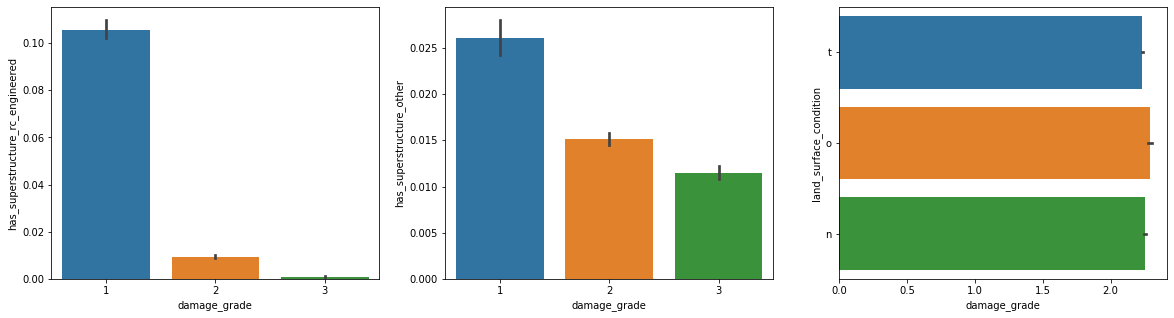

In [14]:

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_rc_engineered'])

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['has_superstructure_other'])

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['land_surface_condition'])


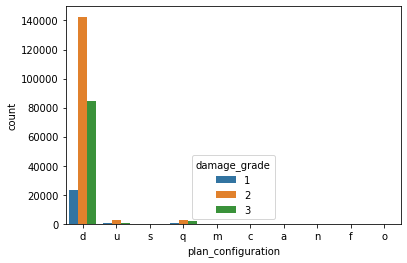

In [15]:
sb.countplot(train_values['plan_configuration'],hue=train_labels["damage_grade"])

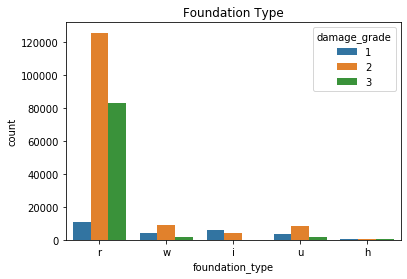

In [16]:
sb.countplot(x = train_values["foundation_type"], hue = train_labels["damage_grade"])
plt.title("Foundation Type")
plt.show()

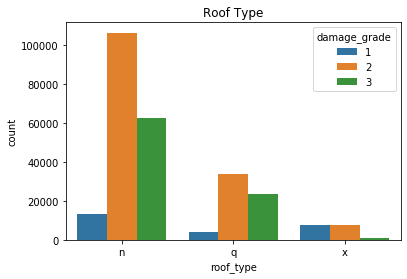

In [17]:
sb.countplot(x = train_values["roof_type"], hue = train_labels["damage_grade"])
plt.title("Roof Type")
plt.show()

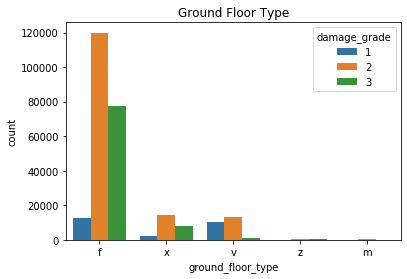

In [18]:
sb.countplot(x = train_values["ground_floor_type"], hue = train_labels["damage_grade"])
plt.title("Ground Floor Type")
plt.show()

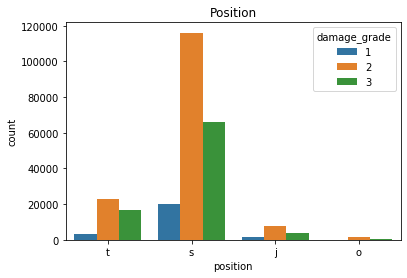

In [19]:
sb.countplot(x = train_values["position"], hue = train_labels["damage_grade"])
plt.title("Position")
plt.show()

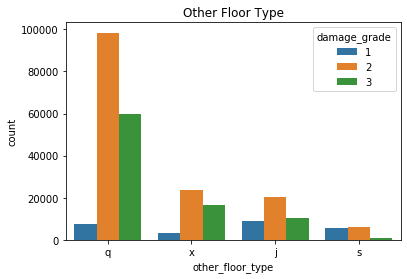

In [20]:
sb.countplot(x = train_values["other_floor_type"], hue = train_labels["damage_grade"])
plt.title("Other Floor Type")
plt.show()

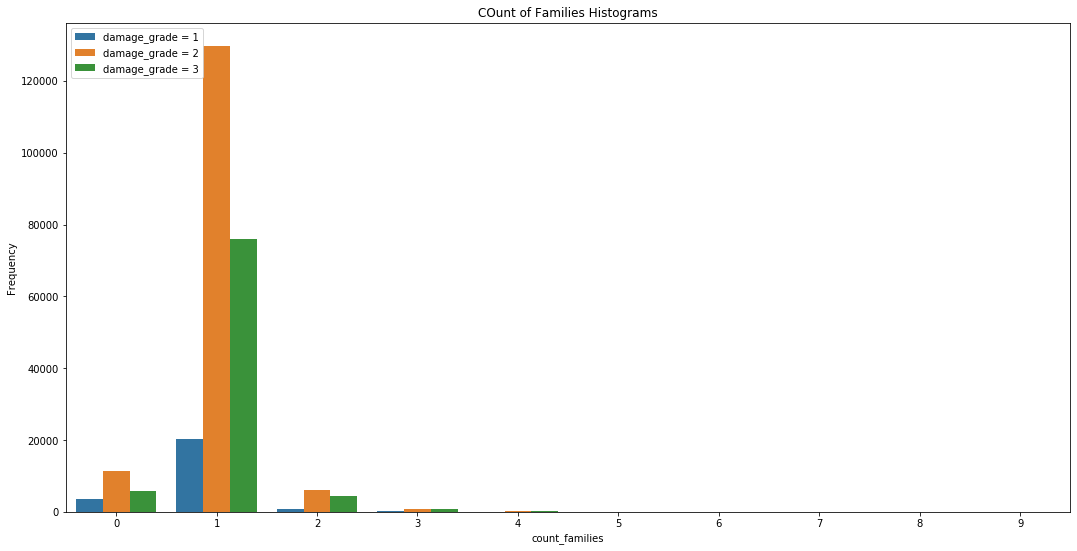

In [21]:
plt.figure(figsize=(18,9))
sb.countplot(x=train_values["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.title("COunt of Families Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

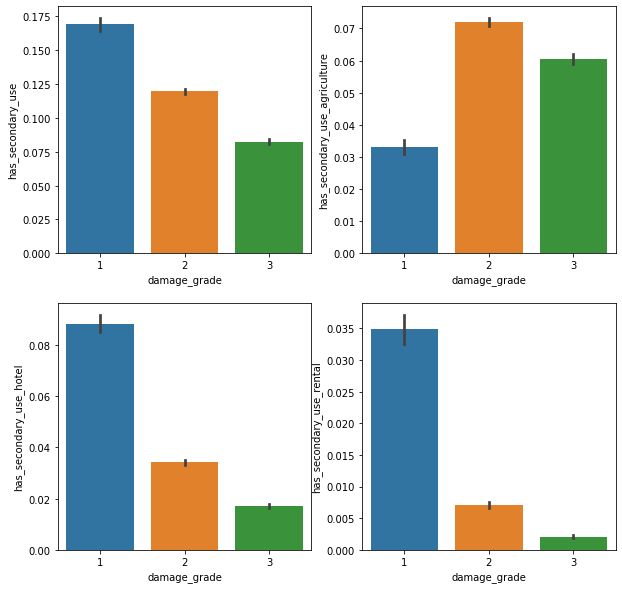

In [22]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

sb.barplot(y= train_values['has_secondary_use'], x= train_labels['damage_grade'], ax = axes[0][0])
sb.barplot(y= train_values['has_secondary_use_agriculture'], x= train_labels['damage_grade'], ax = axes[0][1])
sb.barplot(y= train_values['has_secondary_use_hotel'], x= train_labels['damage_grade'], ax = axes[1][0])
sb.barplot(y= train_values['has_secondary_use_rental'], x= train_labels['damage_grade'], ax = axes[1][1])


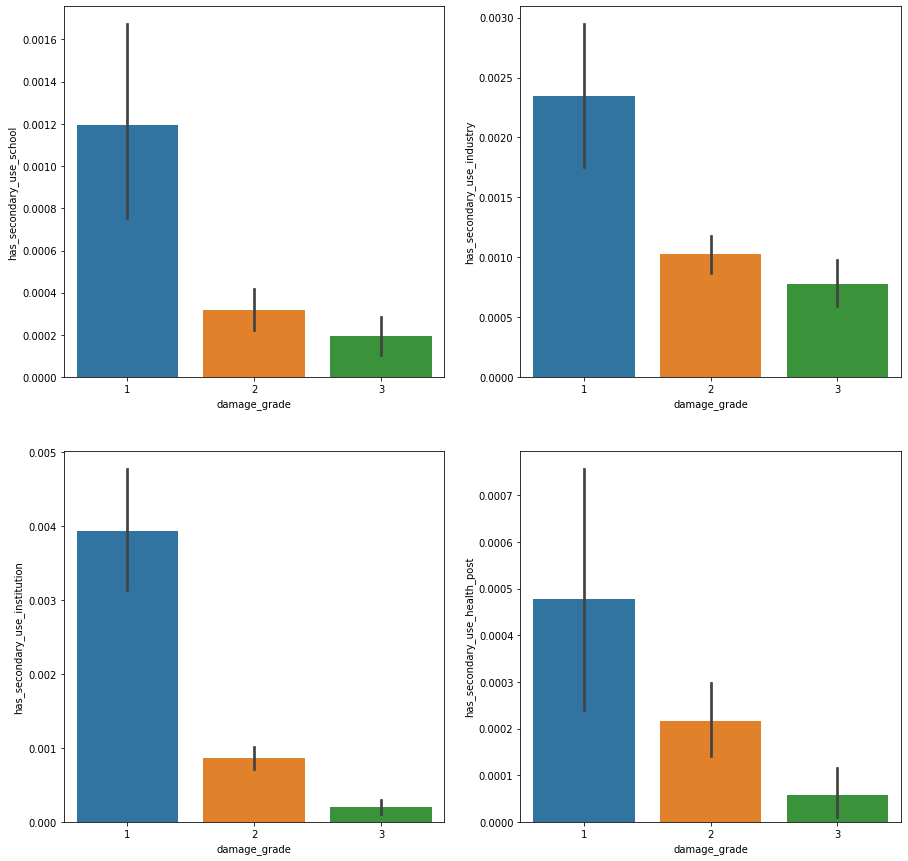

In [23]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 15))

sb.barplot(y= train_values['has_secondary_use_school'], x= train_labels['damage_grade'], ax = axes[0][0])
sb.barplot(y= train_values['has_secondary_use_industry'], x= train_labels['damage_grade'], ax = axes[0][1])
sb.barplot(y= train_values['has_secondary_use_institution'], x= train_labels['damage_grade'], ax = axes[1][0])
sb.barplot(y= train_values['has_secondary_use_health_post'], x= train_labels['damage_grade'], ax = axes[1][1])

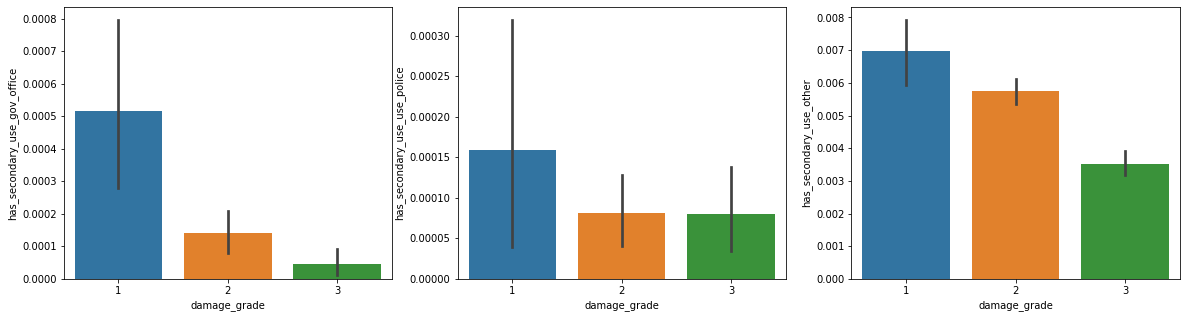

In [24]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sb.barplot(train_labels['damage_grade'], train_values['has_secondary_use_gov_office'])

plt.subplot(1,3,2)
sb.barplot(train_labels['damage_grade'], train_values['has_secondary_use_use_police'])

plt.subplot(1,3,3)
sb.barplot(train_labels['damage_grade'], train_values['has_secondary_use_other'])


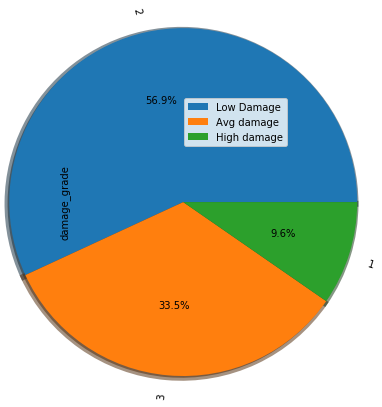

In [25]:
train_labels["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.legend(["Low Damage","Avg damage","High damage"])
plt.show()

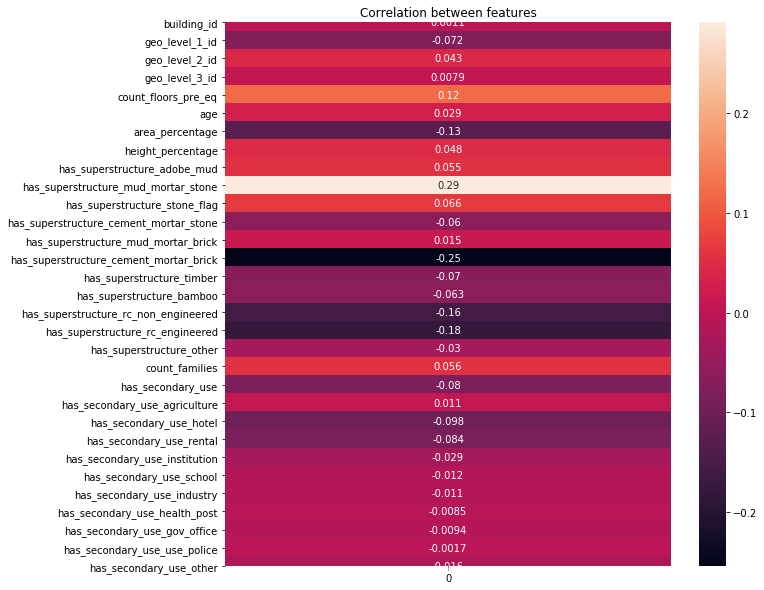

In [26]:
plt.figure(figsize=(10,10))
corr= train_values.corrwith(train_labels["damage_grade"])
sb.heatmap(pd.DataFrame(corr), annot=True)
plt.title('Correlation between features')
plt.show()

# Checking Missing Values and removing them if any

In [27]:
train_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [28]:
train_labels.isnull().sum() * 100 / len(train_values)

building_id     0.0
damage_grade    0.0
dtype: float64

# Check Data Types


In [29]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [30]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

# Dropping columns which are related to the secondary purpose of the building due to no impact in the building damage

In [31]:
colToDrop = []
for col in train_values.columns:
    if "secondary" in col:
        colToDrop.append(col)
train_values.drop(colToDrop, axis=1, inplace=True)

# Check if Data is Balanced

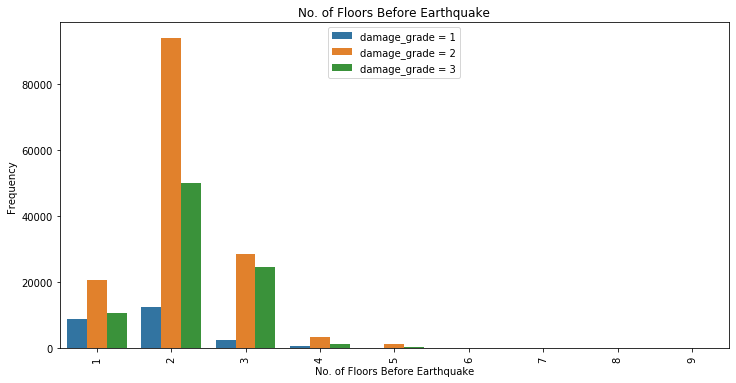

In [32]:
plt.figure(figsize=(12,6))
sb.countplot(train_values["count_floors_pre_eq"], hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("No. of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("No. of Floors Before Earthquake")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

# Check Outliers

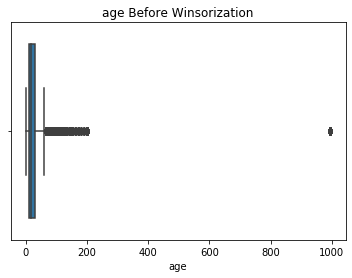

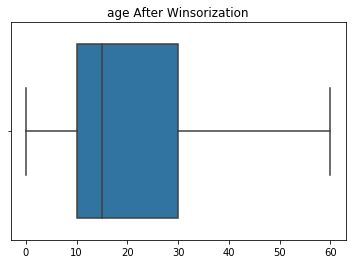

In [33]:
from scipy.stats.mstats import winsorize
name = "age"
data = train_values[name]

#Before balancing
sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After balancing
sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

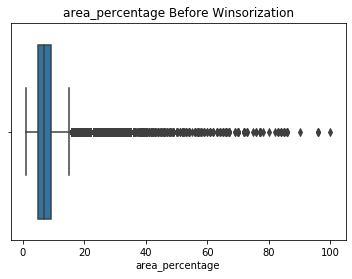

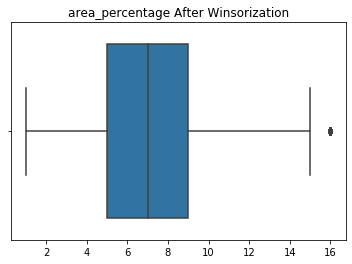

In [34]:
name = "area_percentage"
data = train_values[name]

#Before balancing
sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After balancing
sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

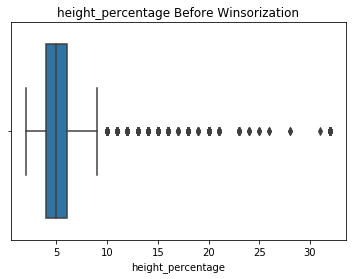

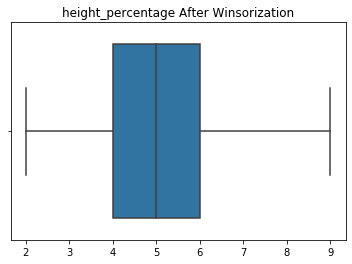

In [35]:
name = "height_percentage"
data = train_values[name]

#Before balancing
sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After balancing
sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

In [36]:
# adding labels to train dataset
train_values = pd.merge(train_values, train_labels, on = 'building_id', how = 'left')

In [37]:
train_values = pd.get_dummies(train_values)

In [38]:
X = train_values.loc[:,train_values.columns!= "damage_grade"].values
y = train_labels.loc[:,train_labels.columns == "damage_grade"].values

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=0)

In [40]:
X_train.shape

(234540, 58)

In [41]:
X_test.shape

(26061, 58)

In [42]:
y_train.shape

(234540, 1)

In [43]:
y_test.shape

(26061, 1)

# Modeling

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(learning_rate=0.15,max_depth=5, min_samples_split=1200, n_estimators= 300, verbose = 1)
boost.fit(X_train, y_train.flatten())
y_pred = boost.predict(X_test)
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred, average='micro')
print(f1_score)

      Iter       Train Loss   Remaining Time 
         1      201262.5029           45.25m
         2      193065.8310           45.35m
         3      187265.1903           45.65m
         4      183214.4948           45.03m
         5      180081.6422           44.84m
         6      177893.2160           44.49m
         7      175772.1699           44.46m
         8      174025.2168           44.18m
         9      172157.0224           44.17m
        10      170959.6697           44.16m
        20      163665.4928           42.02m
        30      160381.5901           40.89m
        40      158227.3805           39.25m
        50      156486.4280           37.68m
        60      155036.4293           36.13m
        70      153460.5699           35.51m
        80      152377.0739           34.45m
        90      151183.4955           33.19m
       100      150161.4683           32.15m
       200      143682.7757           16.18m
       300      139712.9778            0.00s
0.7295959

In [ ]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

model = rf.fit(X_train, y_train)
model.predict(X_test)
print("Random Forest")
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

In [ ]:
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
model=rf.fit(X_train,y_train)
rf_pred=model.predict(X_test)
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            


In [ ]:
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for Random Forest Model")
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

In [ ]:

print("Accuracy Score for Random Forest :",accuracy_score(y_test,rf_pred))

print("\n")

print("classification report for Random Forest :\n\n",classification_report(y_test, rf_pred))
